## Minimal example with Tesorflow 2.0

In [3]:
import numpy as np 
import matplotlib.pyplot as plt
import tensorflow as tf

### Data generation

In [6]:
observations = 1000
xs = np.random.uniform(low=-10,high=10,size=(observations,1))
zs = np.random.uniform(-10,10,(observations,1))
generated_inputs = np.column_stack((xs,zs))
noise = np.random.uniform(-1,1,(observations,1))
generated_targets = 2*xs - 3*zs + 5 +noise
np.savez('TF_intro', inputs=generated_inputs, targets = generated_targets)

### Solving with tensorflow

In [7]:
training_data = np.load('TF_intro.npz')

In [28]:
input_size = 2
output_size = 1
# layers dense method implies np.dot(inputs,weights)+bias
model = tf.keras.Sequential([
                        tf.keras.layers.Dense(output_size,
                                         kernel_initializer=tf.random_uniform_initializer(minval=-0.1,maxval=0.1),
                                        bias_initializer=tf.random_uniform_initializer(minval=-0.1,maxval=0.1)
                                        )
                                        
                        ])
#setting the learning rate 
custom_optimizer = tf.keras.optimizers.SGD(learning_rate = 0.02)


model.compile(optimizer =custom_optimizer, loss='mean_squared_error')           #model.copile(optimizer,loss) configures the model for training
model.fit(training_data['inputs'], training_data['targets'], epochs=100, verbose=2)

Train on 1000 samples
Epoch 1/100
1000/1000 - 0s - loss: 19.9793
Epoch 2/100
1000/1000 - 0s - loss: 1.2661
Epoch 3/100
1000/1000 - 0s - loss: 0.4498
Epoch 4/100
1000/1000 - 0s - loss: 0.3712
Epoch 5/100
1000/1000 - 0s - loss: 0.3726
Epoch 6/100
1000/1000 - 0s - loss: 0.3946
Epoch 7/100
1000/1000 - 0s - loss: 0.4034
Epoch 8/100
1000/1000 - 0s - loss: 0.3945
Epoch 9/100
1000/1000 - 0s - loss: 0.3768
Epoch 10/100
1000/1000 - 0s - loss: 0.3895
Epoch 11/100
1000/1000 - 0s - loss: 0.3900
Epoch 12/100
1000/1000 - 0s - loss: 0.3809
Epoch 13/100
1000/1000 - 0s - loss: 0.3873
Epoch 14/100
1000/1000 - 0s - loss: 0.3906
Epoch 15/100
1000/1000 - 0s - loss: 0.3688
Epoch 16/100
1000/1000 - 0s - loss: 0.3779
Epoch 17/100
1000/1000 - 0s - loss: 0.4141
Epoch 18/100
1000/1000 - 0s - loss: 0.3759
Epoch 19/100
1000/1000 - 0s - loss: 0.3732
Epoch 20/100
1000/1000 - 0s - loss: 0.3763
Epoch 21/100
1000/1000 - 0s - loss: 0.3873
Epoch 22/100
1000/1000 - 0s - loss: 0.3685
Epoch 23/100
1000/1000 - 0s - loss: 0.36

### eXTRACT the weights and bias 

In [29]:
model.layers[0].get_weights()

[array([[ 2.02911  ],
        [-2.9982271]], dtype=float32),
 array([4.986142], dtype=float32)]

In [30]:
weights = model.layers[0].get_weights()[0]
weights


array([[ 2.02911  ],
       [-2.9982271]], dtype=float32)

In [31]:
bias = model.layers[0].get_weights()[1]
bias

array([4.986142], dtype=float32)

### Extract the outputs(make predictions)

In [32]:
model.predict_on_batch(training_data['inputs']).numpy().round(1)

array([[-30.3],
       [-22.2],
       [ 23.6],
       [ 33.5],
       [-29.4],
       [ -8.8],
       [-14.4],
       [  6.8],
       [-25.7],
       [-16.3],
       [  5.2],
       [ 45.3],
       [ 20.4],
       [  5.4],
       [ 30.8],
       [-12.6],
       [  8.9],
       [-10.8],
       [ -5.8],
       [-19.4],
       [ 31.1],
       [ -0.8],
       [ 13.2],
       [ -4.2],
       [-25.9],
       [ 18.2],
       [ 35.3],
       [-20.6],
       [ 11.3],
       [ -2.7],
       [ -6.7],
       [-15.3],
       [  6.9],
       [ 10.4],
       [  3.9],
       [ -1.1],
       [-25. ],
       [ 32.2],
       [ -7.6],
       [ 18.1],
       [ 31.5],
       [ 16.6],
       [ 27.6],
       [ 25.1],
       [  9.3],
       [ -4.9],
       [ 14.3],
       [ 48.6],
       [ 19.2],
       [  1.9],
       [ -9.6],
       [-14.5],
       [-21.6],
       [-23.2],
       [-18.5],
       [ 19.4],
       [ 37.3],
       [  4.8],
       [ 43.9],
       [ -7.8],
       [-13.7],
       [ 17.7],
       [

In [33]:
training_data['targets'].round(1)

array([[-31.1],
       [-22. ],
       [ 23.1],
       [ 32.8],
       [-29.6],
       [ -8. ],
       [-14.7],
       [  5.9],
       [-24.8],
       [-15.3],
       [  5. ],
       [ 45.5],
       [ 20.1],
       [  4.3],
       [ 31.3],
       [-13.1],
       [  8.5],
       [-10.5],
       [ -5.6],
       [-18.6],
       [ 30.8],
       [ -0.1],
       [ 12.7],
       [ -3.6],
       [-26. ],
       [ 19. ],
       [ 36.2],
       [-19.7],
       [ 11. ],
       [ -1.7],
       [ -6.5],
       [-14.1],
       [  6.5],
       [ 10.9],
       [  3.1],
       [ -0.5],
       [-23.8],
       [ 32.9],
       [ -8.3],
       [ 17.8],
       [ 31.4],
       [ 17.8],
       [ 27.9],
       [ 24. ],
       [  9.8],
       [ -5.4],
       [ 14.5],
       [ 47.9],
       [ 19.3],
       [  1.1],
       [ -8.6],
       [-15. ],
       [-21.4],
       [-23.1],
       [-19.5],
       [ 20.2],
       [ 38.2],
       [  4.4],
       [ 44.6],
       [ -8.2],
       [-13.5],
       [ 17.9],
       [

### Plotting the data 

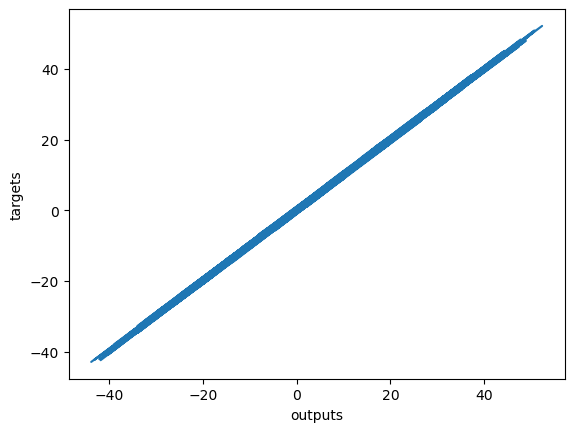

In [34]:
plt.plot(np.squeeze(model.predict_on_batch(training_data['inputs'])),np.squeeze(training_data['targets']))
plt.xlabel('outputs')
plt.ylabel('targets')
plt.show()